In [31]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
df = pd.read_csv(f"merged_stats_caption.csv",  header=0)

In [450]:
word_of_interest = ' mans'
filtered_df = df[df['text_without_seed'].str.contains(word_of_interest, case=False, na=False)]
filtered_df[['image_name', 'text_without_seed']]

,image_name,text_without_seed


In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(word_counts_df):
    word_counts_df[:100]
    wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate_from_frequencies(dict(zip(word_counts_df['Word'], word_counts_df['Frequency'])))
    
    # Display the generated image:
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
def get_common_words(df, column_name):
    remove_words = ["they", "got", "saga","wheel", "them", "away", "at", "surfboard", "curtain", "lights", "air", 
                    "christian", "curly", "collection", "frank", "arafed", "snoop", "men", "sings", "liquid",
                    "chains", "wayne", "ultimate", "try", "name", "john", "outstretched", "another", "summer",
                    "devil", "eagles", "seether", "shades", "water", "image", "neck", "mac", "baby", "stones", 
                    "what", "sex", "two", "araffe", "leopard", "ribbon", "led", "stripe", "life", "battle",
                    "doors", "jon", "open", "beatles", "justin", "a", "wings", "banana", "bob", "halen", "arms",
                    "elton", "love", "blue", "essential", "still", "sad", "nirvana", "clay", "time", "take", "big", 
                    "tears", "sheet", "against", "dirt", "&", "pink", "red", "side", "wine", "season", "montana", 
                    "world", "years",   "that's", "joe", "disney", "lady", "cole", "chicago",
                    "miller", "other", "gold", "lil", "globe", "me", "glenn", "friends", "george", "is", 
                    "records", "bunch", "presley", "dead", "several", "hard", "faith", "background", "maroon",
                    "front", "sky", "through", "day", "good", "hunger", "bruce", "song", "lonely", "year", "third",
                    "faces", "green", "celtic", "stars", "christmas", "painted", "dreadlocks", "lee",
                    "merry", "johnny", "re", "desk", "dark", "thomas", "bald", "gaga", "stage", "logo",
                    "plane", "masks", "lap", "luke", "floor", "mouth", "keith", "cent", "susan", "design",
                    "billy", "plaid", "concert", "of", "uniform", "motion", "furious", "paint", "says",
                    "ray", "songs", "people", "today", "hood", "blood", "middle", "imagine", "feet", "harris", 
                    "surface", "josh", "aldean", "artists", "pool", "butterfly", "that", "last", "little", "shown",
                    "pitbull", "days", "now", "broken", "prince", "small", "chapter", "music", "totally", "laptop",
                    "inside", "him", "frozen", "three", "about", "hands", "behind", "chesney", "dvd", "kelly", "jack", 
                    "peas", "whitney", "band", "dogg", "crowns", "ac", "or", "an", "more", "mustache", "roses", 
                    "hannah", "chest", "it", "church", "human", "complete", "hot", "country", "night", "perfect", 
                    "ludacris", "call", "flacco", "bryan", "legs", "ear", "dreads", "towel", "with", "by", "group",
                    "new", "ac/dc", "so", "large", "colored", "cash", "hits", "from", "girl", "buble", "shelton",
                    "buffett", "special", "sessions", "trio", "combs", "mark", "style", "next", "direction",
                    "florence", "blonde", "series", "beyonce", "silver", "here", "bush", "to", "step", "mp", "punch",
                    "cell", "space", "taylor", "rain", "trans", "earth", "helmet", "mind", "pop", "santana", "no", 
                    "know", "smith", "game", "blurry", "body", "heart", "boyz", "dirty", "youngboy", "shirts", "afro",
                    "nickelback", "songbook", "movie", "this", "my", "stone", "tower", "final", "tuxedo", "fence", 
                    "jayz", "written", "sinatra", "around", "finger", "van", "rings", "black", "b", "araff", "flock", 
                    "reloaded", "grammy", "wanted", "lipstick", "melody", "couple", "eyed", "audio", "charlie", 
                    "colorful", "first", "show", "stewart", "full", "heads", "close", "snow", "all", "rick", "object",
                    "his", "ross", "dc", "michael", "jeezy", "vol", "doorway", "kidz", "nominees", "like", "coat", 
                    "emie", "number", "many", "jay", "biggest", "sweater", "trees", "second", "titled", "brown",
                    "system", "rascal", "headphones", "bat", "boy", "set", "hipsnick", "fan", "hello", "great", 
                    "future", "david", "story", "creed", "sword", "most", "over", "be", "explicit", "for", "family",
                    "various", "guns", "dolls", "neon", "together", "long", "planet", "end", "are", 
                    "soundtrack", "into", "martina", "american", "food", "who", "cap", "dresses", "covered", 
                    "photograph", "statue", "paper", "again", "magazine", "chin", "springsteen", "hip", "brothers", 
                    "card", "on", "vase", "kids", "wow", "tongue", "theater", "barry", "blake", "araffeswritten", 
                    "party", "single", "elvis", "subway", "classics", "purple", "keyshia", "kenny", "mix", 
                    "character", "you", "flats", "striped", "th", "tour", "circular", "young", "clarkson", 
                    "track", "outfit", "out", "city", "top", "tunnel", "only", "bow", "glee", "poses", "us",
                    "birds", "the", "shoulder", "each", "andrea", "am", "blues", "speed", "boys", "print", "ghost",
                    "shorts", "off", "lp", "wooden", "characters", "snake", "pictures", "back", "ocean", "your",
                    "light", "store", "james", "-", "watch", "johnson", "bad", "madonna", "best", "jason", "weeknd", 
                    "get", "video", "jimmy", "pockets", "musical", "fifty", "alien", "bottle", "makeup", "there",
                    "rich", "live", "god", "queen", "made", "tim", "sounds", "dance", "picture", "fire", "right",
                    "forest", "map", "jet", "throne", "lot", "feel", "bodysuit", "ones", "film", "her", "old", "sound",
                    "eric", "born", "just", "original", "butterflies", "rock", "come", "machine", "we", "flames", 
                    "official", "boyle", "one", "flac", "up", "dont", "words", "clear", "hill", "orchestra", 
                    "celebration", "somewhere", "photo", "dmx", "photos",  "in", "feat", "peace", "four",
                    "ground", "download", "word", "across", "down", "line", "jackson", "not", "dj", "fighters",
                    "crowd", "tattoo", "pac", "strait", "rose", "ladder", "teddy", "mary", "mercy", "idol", "yellow", 
                    "near", "greatest", "teeth", "stairs", "how", "journey", "while", "money", "blond", "death",
                    "edition", "home", "parked", "diamond", "smile", "park", "and", "cover", "sidewalk", "rainbow",
                    "worship", "soul", "dragons", "different", "harrison", "hips", "roof", "woods", "crossed", 
                    "eyes", "foo", "five", "gray", "zeppelin", "forever", "blanket", "children", "bopp", "suits",
                    "way", "stand", "art", "paul", "their", "white", "mcgraw", "rope", "very", "im", "rod", "araffes",
                   "box", "star", "hats", "collage", "poster", "angels", "mans", "shirt", "album", "shows", "hair",
                    "santa", "denim", "handwritten", "choke", "formal", "bloody", "golden", "shaped", "substance",
                    "spread", "shape", "america", "handwritten", "choke", "pile", "fireplace", "turban",
                    "formal", "braid", "bag", "porch", "bloody", "square", "golden", "snowflake", "mohawk", "shaped",
                    "ornament", "substance", "headdress", "bouquet", "shape", "america", "presents", "stick", "sunset",
                    "surrounded", "outfits", "child", "pair", "desert", "ledge", "frame", "colors", "its",
                    "silhouette", "pattern", "message", "attire", "items", "record", "smoke",
                    "closed", "awards", "cast", "images", "persons", "swirl", "tall", "dread", "title", "lines","costume",
                    "mans", "pain", "persons", "calvin", "television", "leaves", "hole", "lake",
                    "cloud",  "room", "guetta", "selena", "spears", "gomez", "image", "jazz","label","taken"
                   ,"reggae","metal", "imagegraph", "latin", "arafp"
                   ]

    '''remove_words = ["the", "that", "album", "an", "shows", "cover", "of", "with", "in", "on", "and", "it", "his", 
                    "her", "hits", "to", "for", "image", "is", "next", "up", "other", "now", "what", "arafed",
                   "greatest", "red"]'''
 
    regex_pattern = r'\b(?:{})\b|\d+|\b\w+ing\b|[^a-zA-Z ]'.format('|'.join(remove_words))

    def process_row(row):
        # Lowercase the text to make it uniform
        text = row.lower()
        # Remove unwanted words and numbers using regex
        
        text = text.replace('men', 'man'
                                    ).replace('women', 'woman'
                                    ).replace('people', 'group'
                                    ).replace('womans', 'woman'
                                    ).replace('mans', 'man'
                                    ).replace('persons', 'group'
                                    ).replace('black man', 'blackman'
                                    ).replace('images', 'image'
                                    ).replace('pictures', 'image'
                                    ).replace('picture', 'image'
                                    ).replace('photo', 'image'
                                    ).replace('jackets', 'jacket'
                                    ).replace('guitars', 'guitar'
                                    ).replace('tattoos', 'tattoo'
                                    ).replace('skulls', 'skull'
                                    ).replace('leather jacket', 'leatherjacket'
                                    ).replace('leather pants', 'leatherpant'
                                    ).replace('leather pant', 'leatherpant'
                                    ).replace('leather jackets', 'leatherjacket'
                                    ).replace('baseball bat', 'baseballbat'
                                    ).replace('human', 'person'
                                    ).replace('face', 'person'
                                    ).replace('blonde hair', 'blondehair'
                                    ).replace('long hair', 'longhair'
                                    ).replace('girls', 'woman'
                                    )

        text = pd.Series(text).str.replace(regex_pattern, '', regex=True
                                          )[0]
        # Split the text into words, convert to a set to make them unique, then back to list
        unique_words = list(set(text.split()))
        # Return the list of unique words
        return unique_words
    
    # Apply the function to each row
    df['unique_words'] = df[column_name].apply(process_row)
    
    # Explode the DataFrame so that each word gets its own row
    words_list = df.explode('unique_words')['unique_words']
    
    # Filter out any remaining unwanted strings (like single dashes or ampersands if they still exist)
    words_list = words_list[words_list != '-']
    words_list = words_list[words_list != '&']
    words_list = words_list[words_list != "'"]
    words_list = words_list[words_list != "ii"]
    words_list = words_list[words_list != "x"]
    words_list = words_list[words_list != "dont"]
    words_list = words_list[words_list != "mp"]
    words_list = words_list[words_list != "or"]
    words_list = words_list[words_list != "th"]
    words_list = words_list[words_list != "nick"]
    words_list = words_list[words_list != "pac"]
    words_list = words_list[words_list != "im"]
    words_list = words_list[words_list != "award"]
    words_list = words_list[words_list != "mans"]
    words_list = words_list[words_list != "cd"]
    words_list = words_list[words_list != "de"]


    words_list = words_list[words_list.str.len() > 2] 
    word_counts = words_list.value_counts()

    word_counts_df = word_counts.reset_index()
    word_counts_df.columns = ['Word', 'Frequency']
    
    word_counts_df = word_counts_df[word_counts_df['Frequency']> 2]

    return word_counts_df


def plot_bar(df):
    top_words = df.sort_values(by='Frequency', ascending=False).head(10)

    # Plotting the bar chart
    plt.figure(figsize=(12, 8))
    plt.bar(top_words['Word'], top_words['Frequency'], color='skyblue')
    plt.xlabel('Words', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('Top 10 Most Frequent Words', fontsize=16)
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust the layout to not cut off labels
    plt.show()

             Word  Frequency
0             man       8062
1           woman       4367
2          guitar       1018
3             hat        805
4            suit        763
5           dress        691
6          person        679
7             tie        514
8        longhair        459
9            head        395
10          chair        329
11           hand        301
12         jacket        288
13           sign        271
14           bird        268
15            car        266
16     microphone        266
17          beard        259
18          field        254
19           wall        240
20          clock        229
21           tree        228
22     sunglasses        220
23            dog        207
24         street        203
25          skull        197
26        cartoon        183
27            bed        182
28          piano        180
29          couch        180
30          table        176
31          knife        170
32          bench        163
33         cir

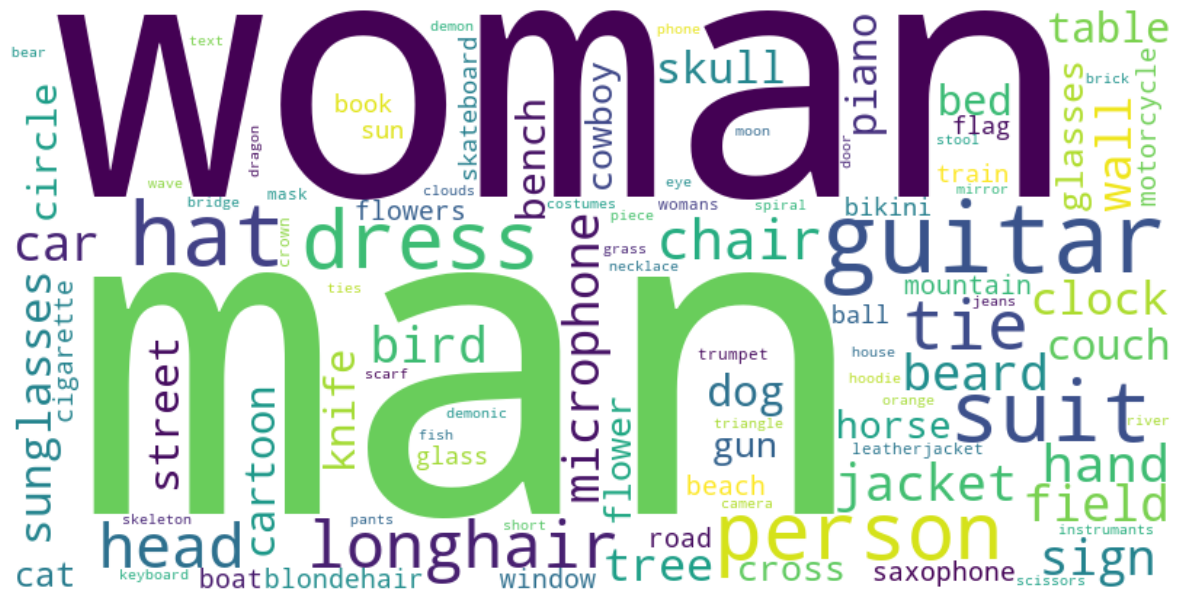

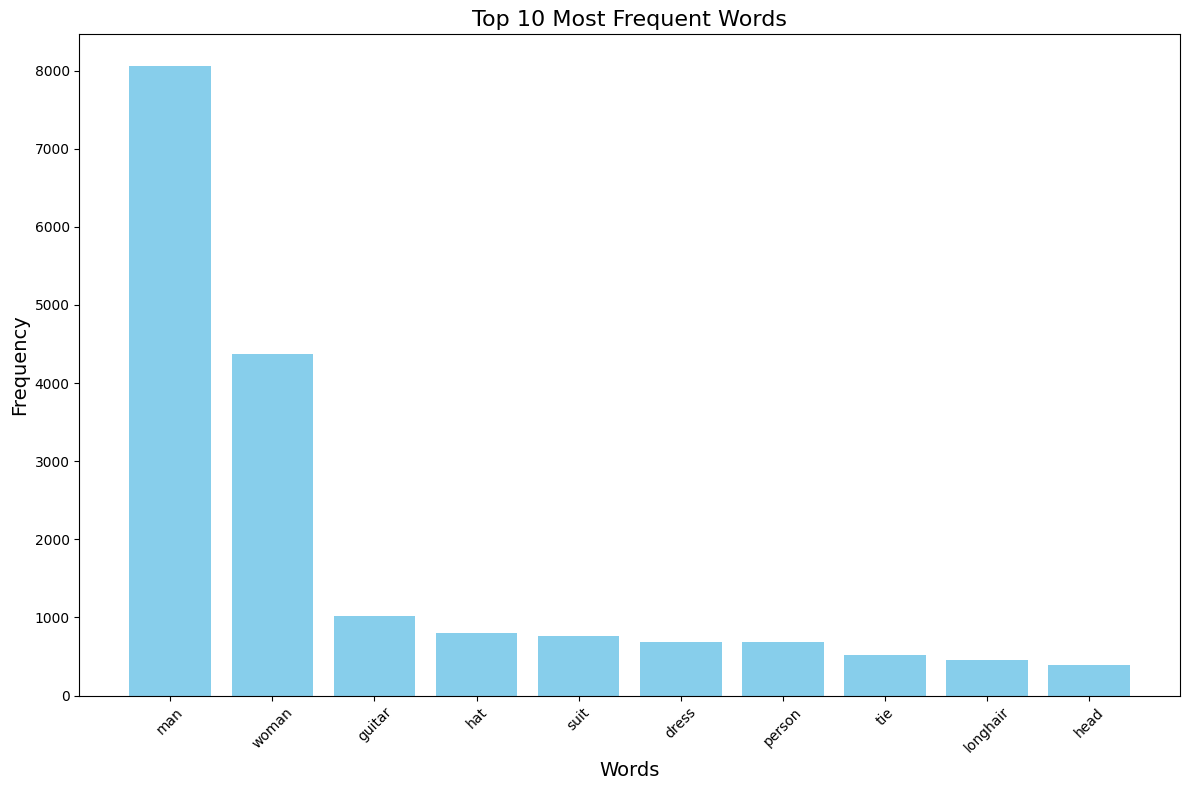

In [53]:
word_counts_df = get_common_words(df,'text_with_seed')
print(word_counts_df[:60])
word_counts_df = word_counts_df[:100]
if len(word_counts_df[:20]) > 0:
    plot_wordcloud(word_counts_df)
    plot_bar(word_counts_df)

In [476]:
csv_file_path = 'words_with_seed.csv' 
word_counts_df.to_csv(csv_file_path, index=False, encoding='utf-8-sig')

          Word  Frequency
0          man       4552
1       person       3121
2        woman       2879
3         book        854
4       guitar        853
5          hat        675
6         sign        613
7        dress        485
8         wall        457
9         suit        423
10        hand        396
11       chair        337
12        head        331
13         tie        328
14     cartoon        307
15    longhair        305
16       field        293
17      jacket        276
18  microphone        268
19       table        268
20      street        266
21         car        259
22        bird        254
23       clock        240
24        tree        234
25         bed        209
26         dog        195
27       couch        181
28       knife        177
29       bench        170
30       beach        163
31  sunglasses        160
32       beard        160
33       piano        160
34      window        151
35       phone        150
36      flower        143
37  skateboa

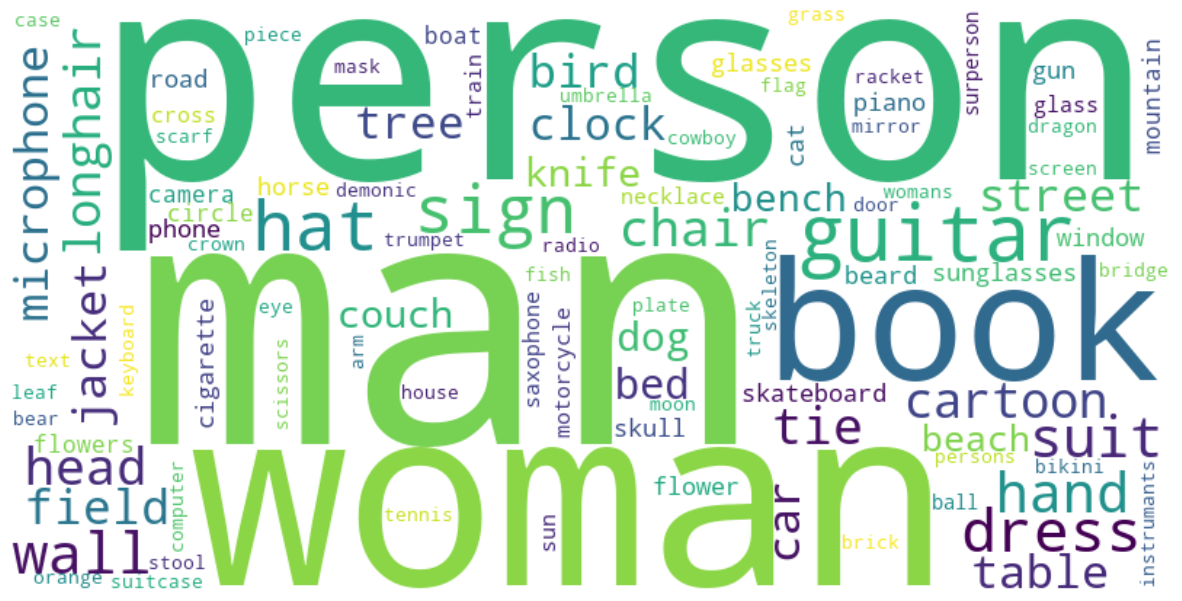

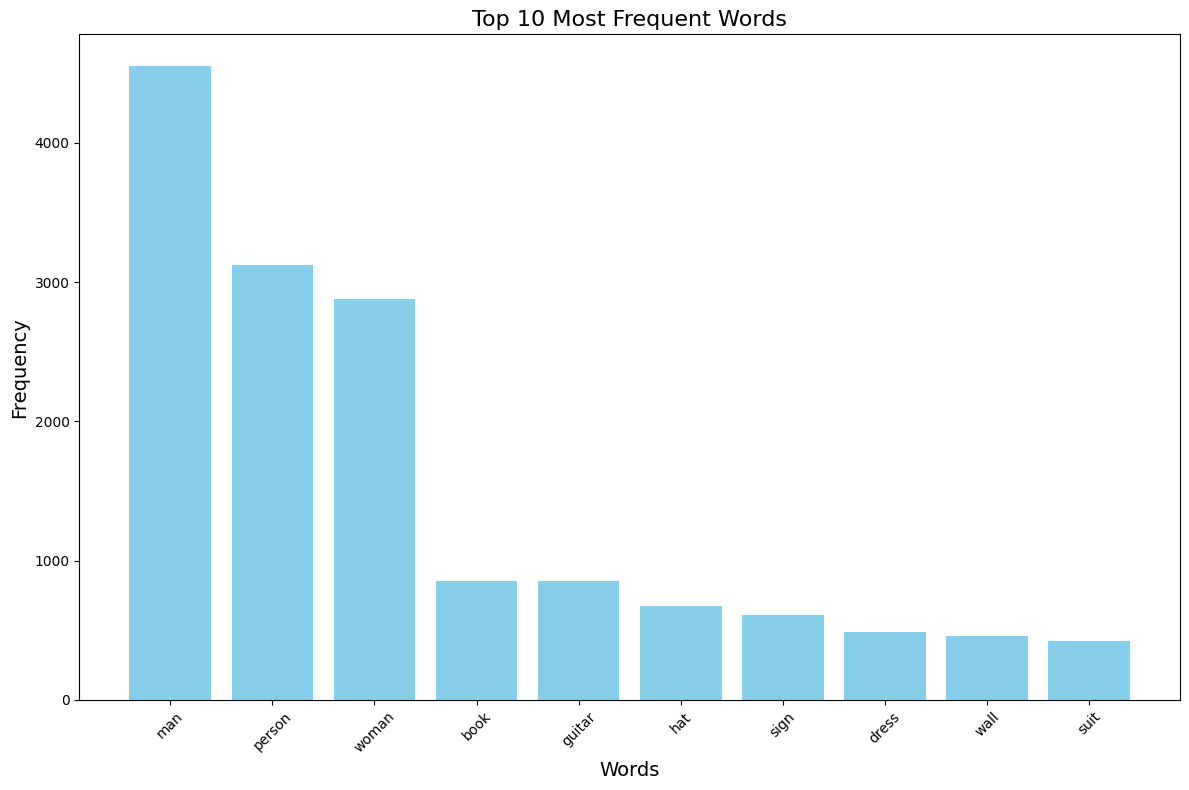

In [52]:
word_counts_df = get_common_words(df,'text_without_seed')
print(word_counts_df[:60])
word_counts_df = word_counts_df[:100]
if len(word_counts_df[:20]) > 0:
    plot_wordcloud(word_counts_df)
    plot_bar(word_counts_df)

In [462]:
word_of_interest = ' lake '
filtered_df = df[df['text_with_seed'].str.contains(word_of_interest, case=False, na=False)]
filtered_df[['image_name', 'text_with_seed']]

,image_name,text_with_seed
1971,2011_2036.png,an album cover that shows a painting of a lake...
1996,2011_2062.png,an album cover that shows a snow covered lake ...


In [35]:
genres_series = df['genres_mu'].str.split(', ').explode()

unique_genres = genres_series.unique()
unique_genres_df = pd.DataFrame(unique_genres, columns=['Unique Genres'])
unique_genres_df.sort_values(by='Unique Genres', inplace=True)
unique_genres_df.reset_index(drop=True, inplace=True)

genres_list = unique_genres_df['Unique Genres'].tolist()

genre_counts = {genre: 0 for genre in genres_list}

# Iterate through each row of the dataframe
for index, row in df.iterrows():
    # This assumes that each cell in 'big_genres' is a string of genres separated by commas
    if isinstance(row['genres_mu'],str):
        genres = row['genres_mu'].replace(",",", ").replace("&",",")
        genres = genres.split(',')
        # Count each genre
        for genre in genres:
            genre = genre.strip()  # Remove any leading/trailing whitespace
            if genre in genre_counts:
                genre_counts[genre] += 1

genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])
genre_counts_df['Percentage'] = round((genre_counts_df['Count'] ) / len(df), 3)
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)
genre_counts_df.reset_index(drop=True, inplace=True)

frequent_genres = genre_counts_df['Genre'][:30].tolist()
frequent_genres = frequent_genres[:10]
frequent_genres

['Pop',
 'Rock',
 'Jazz',
 'Alternative Rock',
 'Metal',
 'Country',
 'Latin Music',
 'Reggae',
 'Blues',
 'Folk']

In [ ]:
for gen in frequent_genres:
    print(f"--------------   {gen}   -------------- ")
    print(f"--------------   WITH SEED    -------------- ")
    
    genre_df = df[df['genres_mu'].str.contains(gen, na=False)]
    word_counts_df = get_common_words(genre_df,'text_with_seed')
    print(word_counts_df[:20])
    if len(word_counts_df[:20]) > 0:
        plot_wordcloud(word_counts_df)
        plot_bar(word_counts_df)

    print(f"--------------   {gen}   -------------- ")
    print(f"--------------   WITHOUT SEED    -------------- ")
    word_counts_df = get_common_words(genre_df,'text_without_seed')
    print(word_counts_df['Word'][:20])
    if len(word_counts_df[:20]) > 0:
        plot_wordcloud(word_counts_df)
        plot_bar(word_counts_df)